# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Sowdamini

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [1]:
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import Counter - you should have that already.

# %conda info

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

print('All prereqs installed.')

All prereqs installed.


1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

## Question-1

In [2]:
import requests
from bs4 import BeautifulSoup
import pickle

article_site = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
html_page = article_site.text

print(article_site.status_code)
print(article_site.headers['content-type'])

with open('article.pkl', 'wb') as f:
    pickle.dump(article_site.text, f)

200
text/html; charset=UTF-8


## Question-2

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [3]:
with open('article.pkl', 'rb') as f:
    article_html = pickle.load(f)

soup = BeautifulSoup(article_html, 'html.parser')
article_element = soup.find('article')

#Here used lower as part of the next step i.e Question-3

article_element = article_element.get_text().lower()
print(article_element)



how laser headlights work


                130 comments            

by:
lewin day



march 22, 2021








when we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. engines, fuel efficiency, and the switch to electric power are all more front of mind. however, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon hids and, more recently, leds. now, a new technology is on the scene, with lasers!

laser headlights?!
bwm’s prototype laser headlight assemblies undergoing testing.
the first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. obviously, coherent beams of monochromatic light would make for poor illumination outside o

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

## Question-3

In [4]:
def not_space_pun_stop(token):
    return not (token.is_space or token.is_punct or token.is_stop)

In [5]:
import spacy as sp
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter

nlp = sp.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element)

#Remove all the space, puntuation, stop words
without_space_punct_stop = [token for token in doc if not_space_pun_stop(token)]
#print(without_space_punct_stop)


word_freq_tokens = Counter(map(str,without_space_punct_stop))
print(word_freq_tokens.most_common(10))

#Getting the most 5 common tokens to be used in Question-5
token_set = set()
for token, freq in word_freq_tokens.most_common(5):
    token_set.add(token)
print(token_set)

[('laser', 35), ('headlights', 19), ('headlight', 11), ('technology', 10), ('led', 10), ('light', 9), ('high', 8), ('beam', 7), ('automotive', 6), ('leds', 6)]
{'led', 'laser', 'technology', 'headlights', 'headlight'}


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

## Question-4

In [6]:
frequent_lemmas = [token.lemma_ for token in doc if not_space_pun_stop(token)]
freq_lemmas = Counter(frequent_lemmas)
print(freq_lemmas.most_common(10))

#Getting the most 5 common lemmas to be used in Question-5
lemma_set = set()
for lemma, freq in freq_lemmas.most_common(5):
    lemma_set.add(lemma)
print(lemma_set)

[('laser', 40), ('headlight', 30), ('beam', 12), ('technology', 10), ('light', 10), ('lead', 10), ('high', 9), ('come', 7), ('automotive', 6), ('design', 6)]
{'laser', 'technology', 'headlight', 'beam', 'light'}


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

## Question-5

In [7]:
def score_sentence(doc, common_5_set):
    score_list = []
    sentences = list(doc.sents)
    for sentence in sentences:
        count = 0
        word_count =0
        for token in sentence:
            if token.lemma_ in common_5_set:
                count += 1
            word_count += 1 
        score = count/word_count
        score_list.append(score)
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    print(score,":",sent_str)
    return score_list
                
print("************ Sentence Score by Token *******************")
score_list_token = score_sentence(doc,token_set)
print("************ Sentence Score by Lemma *******************")
score_list_lemma = score_sentence(doc,lemma_set)

************ Sentence Score by Token *******************
0.2608695652173913 : posted in car hacks, engineering, featured, laser hacks, slidertagged laser, laser headlight, laser headlights, light 
************ Sentence Score by Lemma *******************
0.30434782608695654 : posted in car hacks, engineering, featured, laser hacks, slidertagged laser, laser headlight, laser headlights, light 


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

## Question-6

[0.09302325581395349, 0.0, 0.0, 0.06666666666666667, 0.21052631578947367, 0.2, 0.11538461538461539, 0.0, 0.17142857142857143, 0.1111111111111111, 0.041666666666666664, 0.2, 0.038461538461538464, 0.16666666666666666, 0.125, 0.08333333333333333, 0.03125, 0.0, 0.045454545454545456, 0.043478260869565216, 0.07142857142857142, 0.0, 0.09259259259259259, 0.07692307692307693, 0.0, 0.08333333333333333, 0.05128205128205128, 0.1, 0.05, 0.05405405405405406, 0.0, 0.0, 0.0, 0.0625, 0.05555555555555555, 0.0, 0.03571428571428571, 0.10526315789473684, 0.1, 0.06818181818181818, 0.030303030303030304, 0.06666666666666667, 0.09090909090909091, 0.034482758620689655, 0.10344827586206896, 0.02702702702702703, 0.07142857142857142, 0.0, 0.04, 0.2608695652173913]


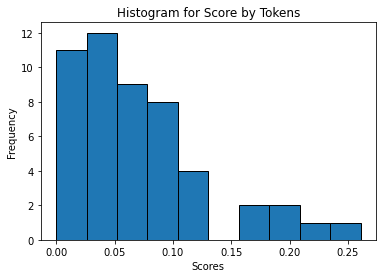

In [8]:
from matplotlib import pyplot as plt

print(score_list_token)

fig, ax = plt.subplots(1, 1)
ax.hist(score_list_token,edgecolor = 'black')
# Set title
ax.set_title("Histogram for Score by Tokens")
  
# adding labels
ax.set_xlabel('Scores')
ax.set_ylabel('Frequency')

plt.show()

## I see that the frequency of the score ranging from 0 to 12. From the graph i see that the range of values from 0.025 to 0.05 has the most occurrence of 12 times. 

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

## Question-7

[0.09302325581395349, 0.0, 0.0, 0.06666666666666667, 0.21052631578947367, 0.2, 0.15384615384615385, 0.08695652173913043, 0.17142857142857143, 0.05555555555555555, 0.08333333333333333, 0.2, 0.038461538461538464, 0.16666666666666666, 0.125, 0.08333333333333333, 0.09375, 0.047619047619047616, 0.09090909090909091, 0.043478260869565216, 0.07142857142857142, 0.0, 0.09259259259259259, 0.05128205128205128, 0.0, 0.08333333333333333, 0.10256410256410256, 0.05, 0.05, 0.05405405405405406, 0.0, 0.0, 0.0, 0.0625, 0.1111111111111111, 0.03389830508474576, 0.03571428571428571, 0.05263157894736842, 0.1, 0.13636363636363635, 0.06060606060606061, 0.06666666666666667, 0.09090909090909091, 0.034482758620689655, 0.10344827586206896, 0.02702702702702703, 0.08928571428571429, 0.03571428571428571, 0.04, 0.30434782608695654]


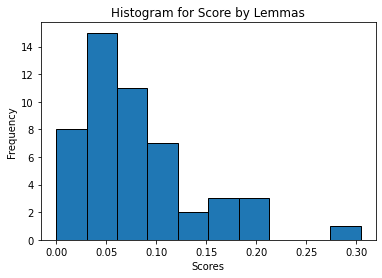

In [9]:
from matplotlib import pyplot as plt

print(score_list_lemma)

fig, ax = plt.subplots(1, 1)
ax.hist(score_list_lemma,edgecolor = 'black')
# Set title
ax.set_title("Histogram for Score by Lemmas")
  
# adding labels
ax.set_xlabel('Scores')
ax.set_ylabel('Frequency')

plt.show()

I see that the frequency ranges from 0 to 14 from histogram. If i can compare the score with tokens and lemmas, tokens list has many values between 0.0 to 0.025 but lemmas has only 8 frequency. The most scores are in range of 0.025 to little more than 0.05.

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

## Question -8 

 i see the tokens(space,comma,numerics) has to be removed and lemmas with plural words are said to be removed from lemmas list. I would change the code in Question - 3 where we were trying to vomit only white space and include few functions to remove few extra's by makeing a list and use that list to get the final list od nouns